In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('Prayagraj_Traffic_Data_Cleaned.csv')
df.sample(5)

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,is_weekend,hour_of_day
7312,9745,2023-01-07 18:20:00,5,Naini Bridge,25.4088,81.8592,211.0,24.20,120,84,3,33,Heatwave,Saturday,0,0,4.06,119,21,18,53,1,18
5523,9720,2023-01-07 17:50:00,10,Minto Park,25.4352,81.8820,159.0,30.97,120,78,4,38,Clear,Saturday,0,0,3.04,95,15,14,35,1,17
5919,9527,2023-01-07 14:40:00,7,Phaphamau,25.4945,81.8686,76.0,40.53,120,62,4,54,Clear,Saturday,0,0,1.85,41,13,7,15,1,14
2701,440,2023-01-01 07:10:00,10,Minto Park,25.4352,81.8820,58.0,41.85,120,67,4,48,Clear,Sunday,1,0,1.33,30,9,5,14,1,7
1514,2704,2023-01-02 21:00:00,4,Tagore Town,25.4675,81.8867,116.0,29.59,120,61,6,53,Cold Wave,Monday,0,0,2.37,70,12,12,22,0,21


In [57]:
df.columns

Index(['record_id', 'timestamp', 'intersection_id', 'intersection_name',
       'latitude', 'longitude', 'vehicle_count', 'average_speed',
       'signal_cycle_time', 'green_time', 'yellow_time', 'red_time',
       'weather_condition', 'day_of_week', 'is_holiday', 'event',
       'pollution_level', 'car_count', 'bus_count', 'truck_count',
       'motorcycle_count', 'is_weekend', 'hour_of_day'],
      dtype='object')

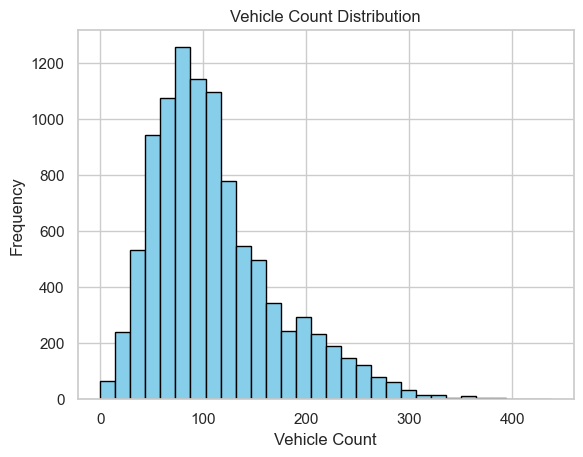

In [43]:
# Plot histogram for a specific column (e.g., 'vehicle_count')
df['vehicle_count'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicle Count')
plt.ylabel('Frequency')
plt.show()



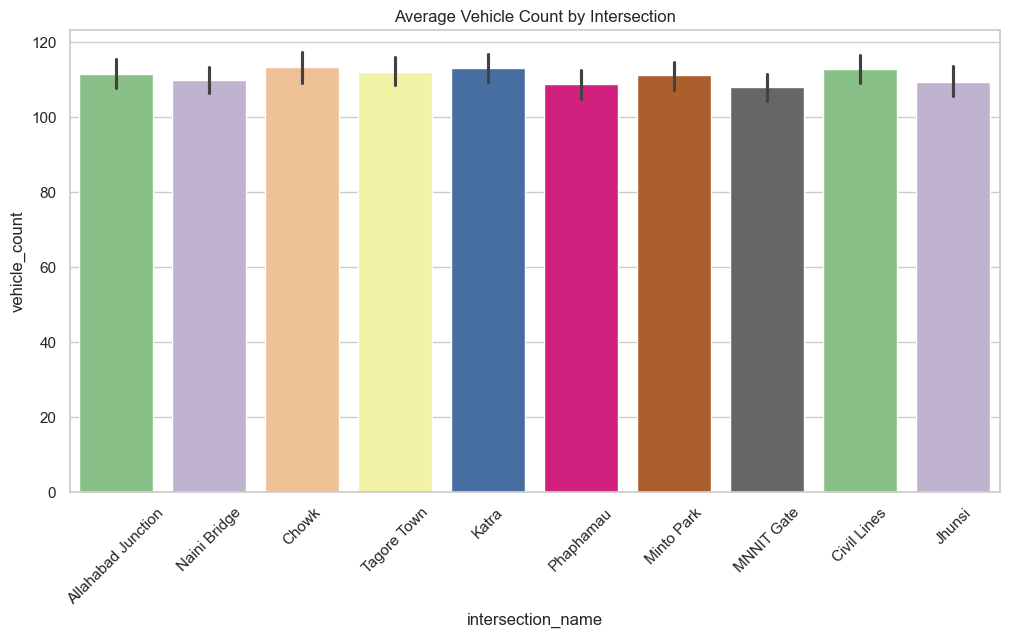

In [68]:
# Bar plot for the count of vehicles by intersection
plt.figure(figsize=(12, 6))
sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='Accent',hue='intersection_name')
plt.title('Average Vehicle Count by Intersection')
plt.xticks(rotation=45)
plt.show()


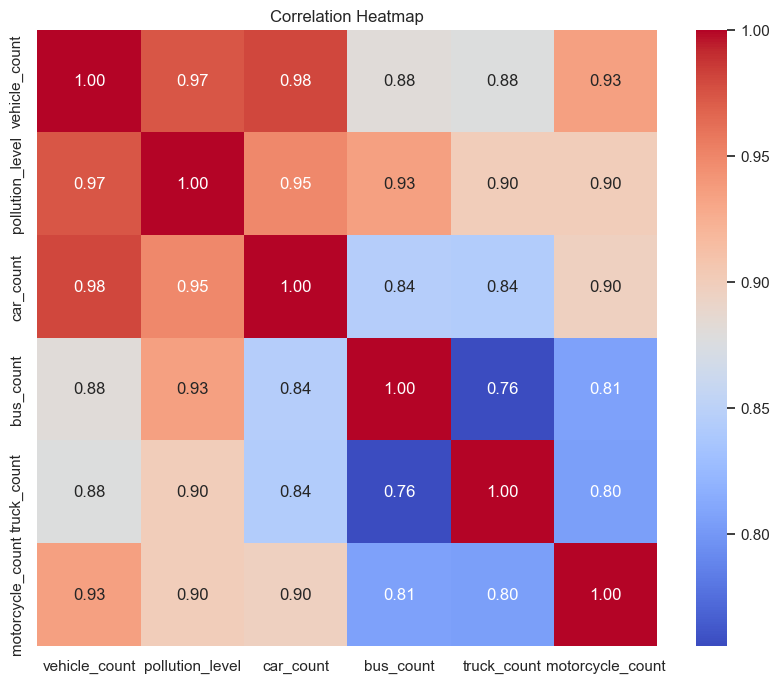

In [45]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[['vehicle_count', 'pollution_level', 'car_count', 'bus_count', 'truck_count', 'motorcycle_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


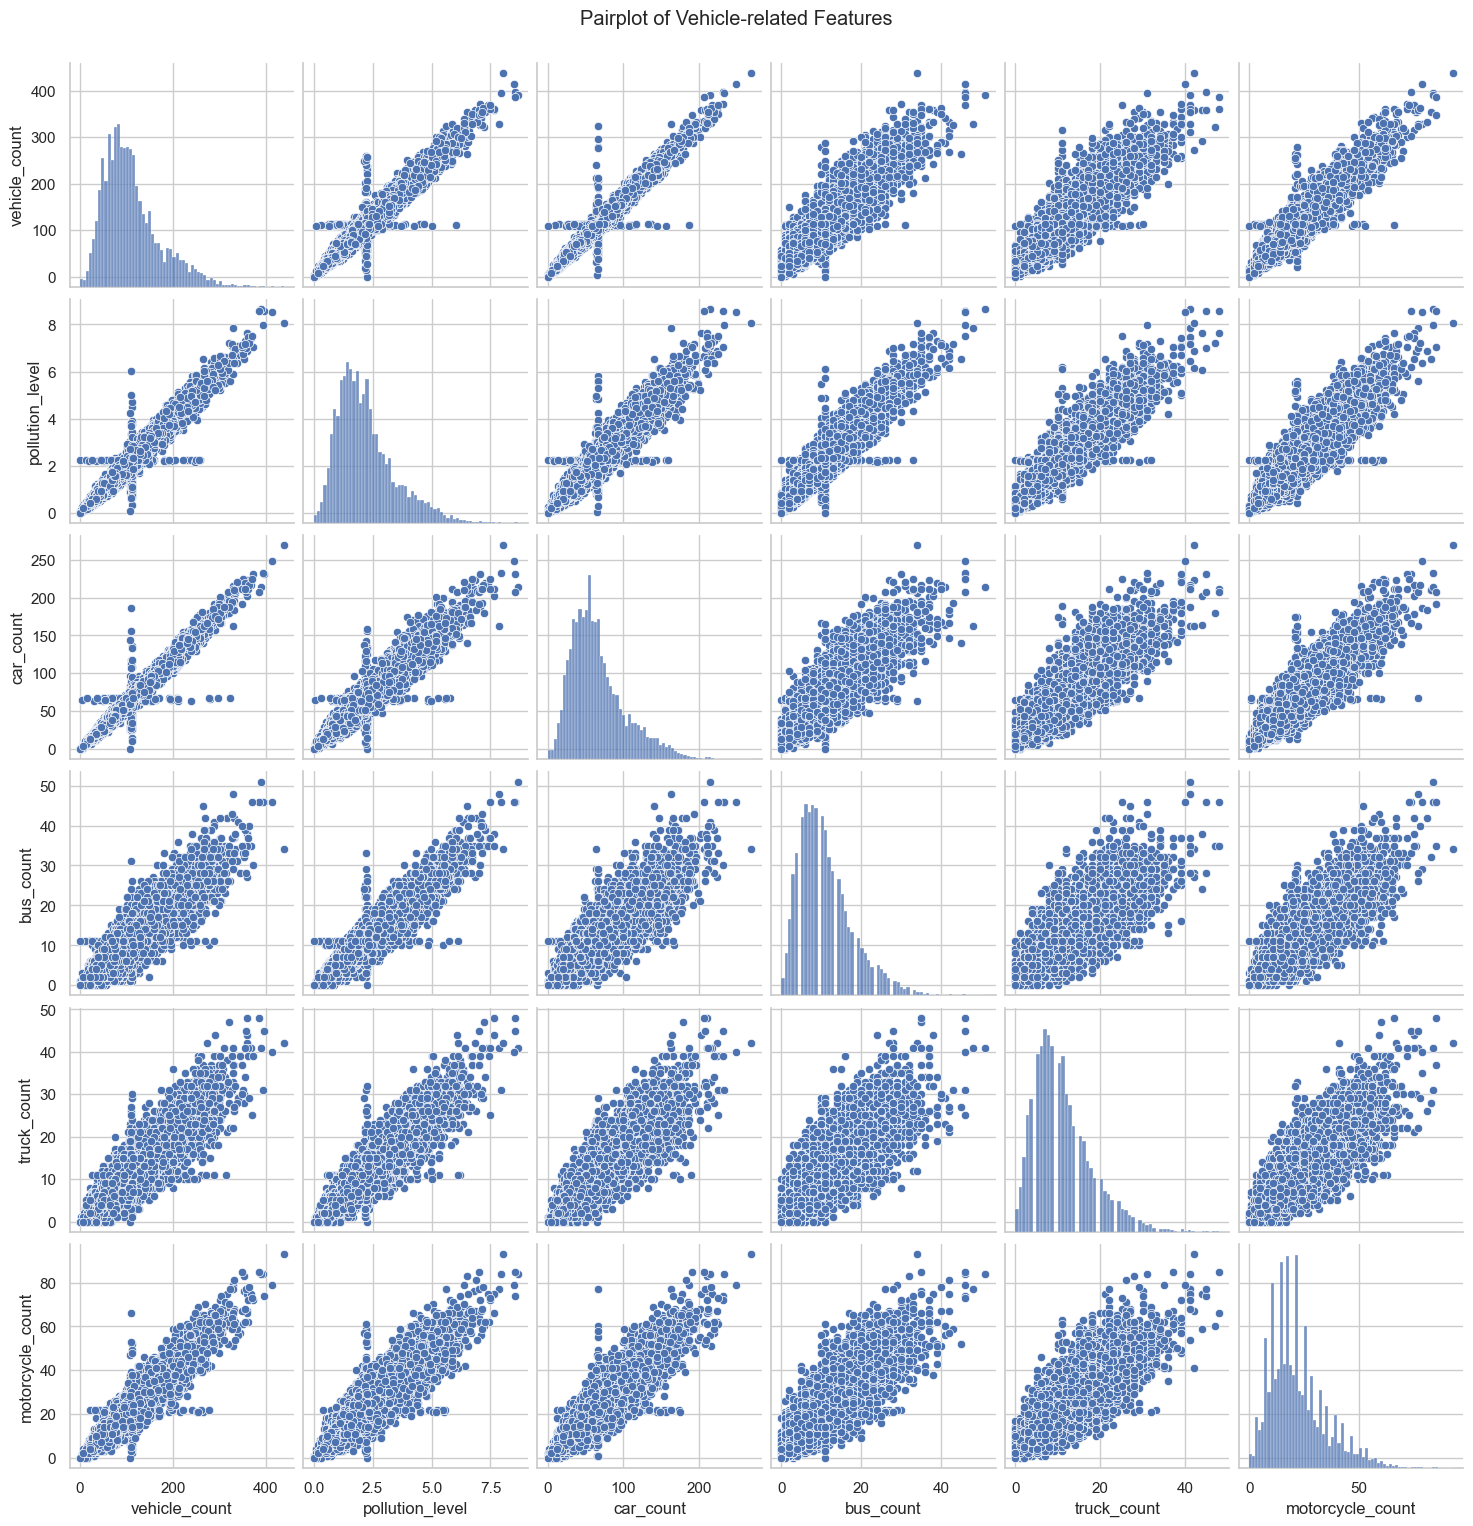

In [46]:
# Pairplot for selected columns
sns.pairplot(df[['vehicle_count', 'pollution_level', 'car_count', 'bus_count', 'truck_count', 'motorcycle_count']])
plt.suptitle('Pairplot of Vehicle-related Features', y=1.02)
plt.show()


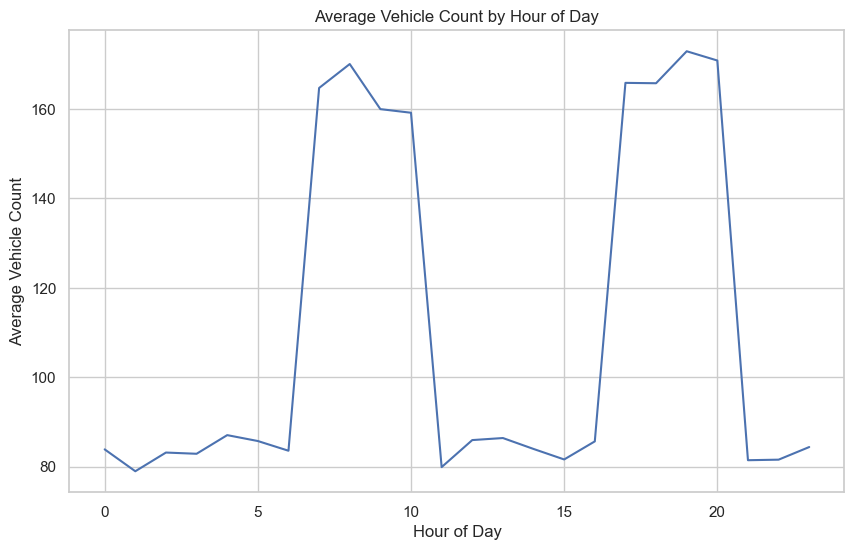

In [77]:
# Line plot of average vehicle count by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='vehicle_count', data=df, errorbar=None)
plt.title('Average Vehicle Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.show()


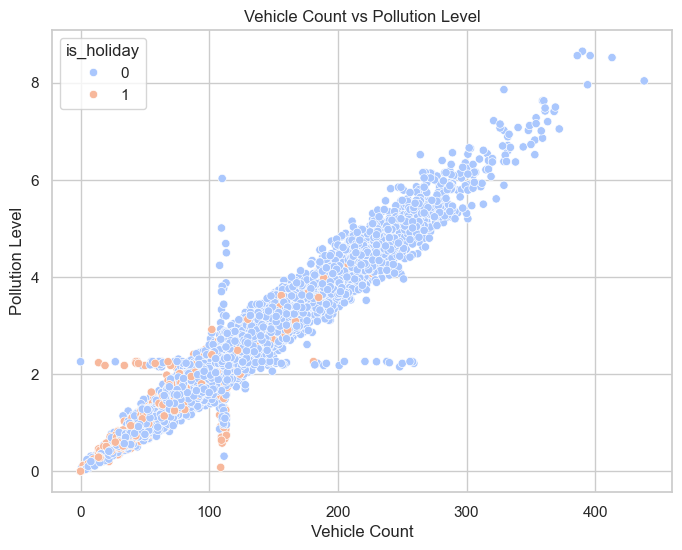

In [48]:
# Scatter plot between vehicle count and pollution level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vehicle_count', y='pollution_level', data=df, hue='is_holiday', palette='coolwarm')
plt.title('Vehicle Count vs Pollution Level')
plt.xlabel('Vehicle Count')
plt.ylabel('Pollution Level')
plt.show()


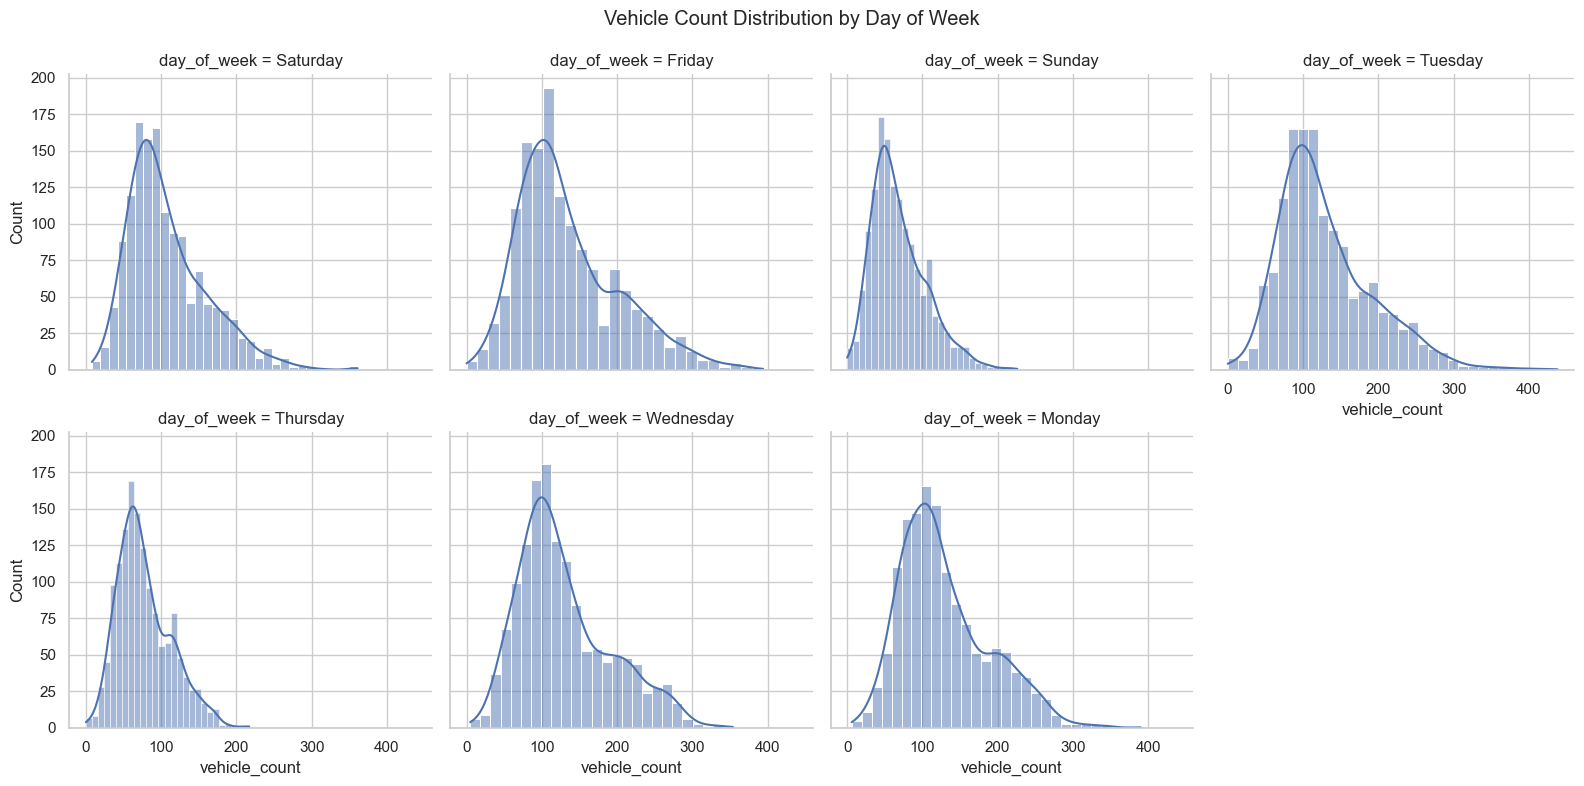

In [49]:
# Facet grid for 'vehicle_count' by 'day_of_week'
g = sns.FacetGrid(df, col='day_of_week', col_wrap=4, height=4)
g.map(sns.histplot, 'vehicle_count', kde=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Vehicle Count Distribution by Day of Week')
plt.show()


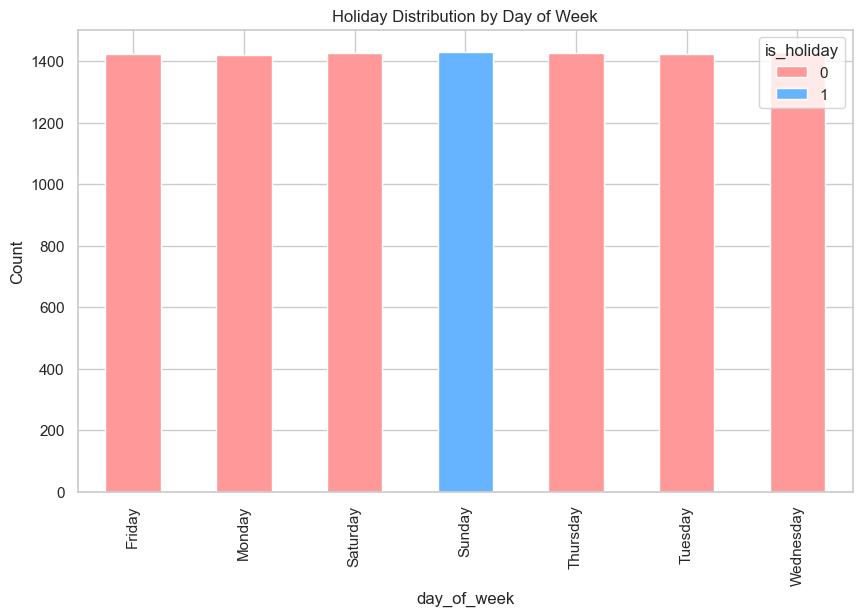

In [50]:
# Stacked bar plot for 'is_holiday' across 'day_of_week'
df.groupby(['day_of_week', 'is_holiday']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Holiday Distribution by Day of Week')
plt.ylabel('Count')
plt.show()


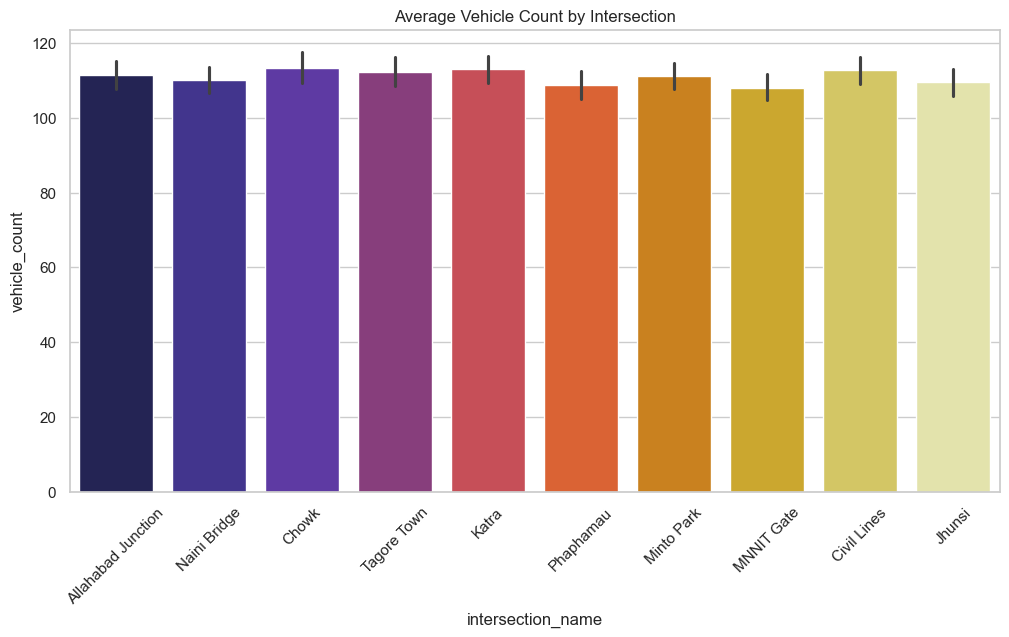

In [76]:
# Bar plot of average 'vehicle_count' by 'intersection_name'
plt.figure(figsize=(12, 6))
sns.barplot(x='intersection_name', y='vehicle_count', data=df, estimator='mean', palette='CMRmap',hue='intersection_name')
plt.title('Average Vehicle Count by Intersection')
plt.xticks(rotation=45)
plt.show()


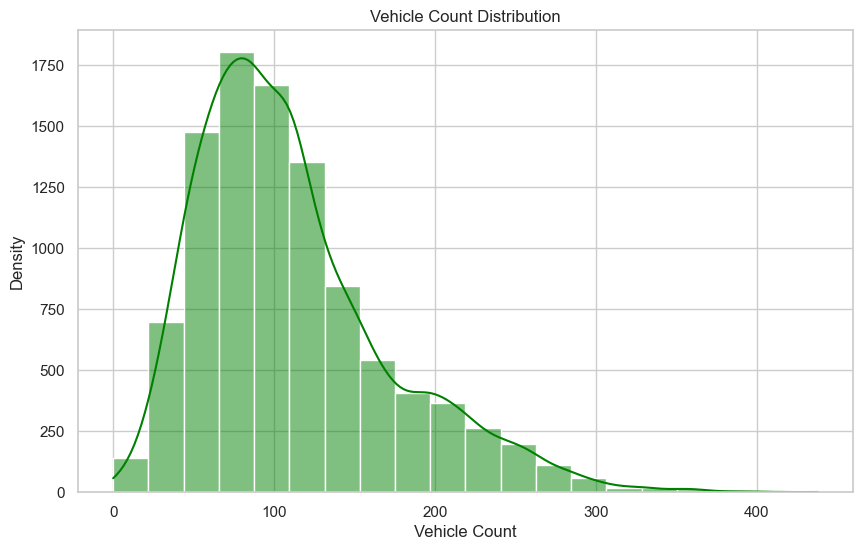

In [62]:
# Distribution plot for 'vehicle_count'
plt.figure(figsize=(10, 6))
sns.histplot(df['vehicle_count'].dropna(), kde=True, color='green', bins=20)
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicle Count')
plt.ylabel('Density')
plt.show()


Text(342.25, 0.5, 'Intersection')

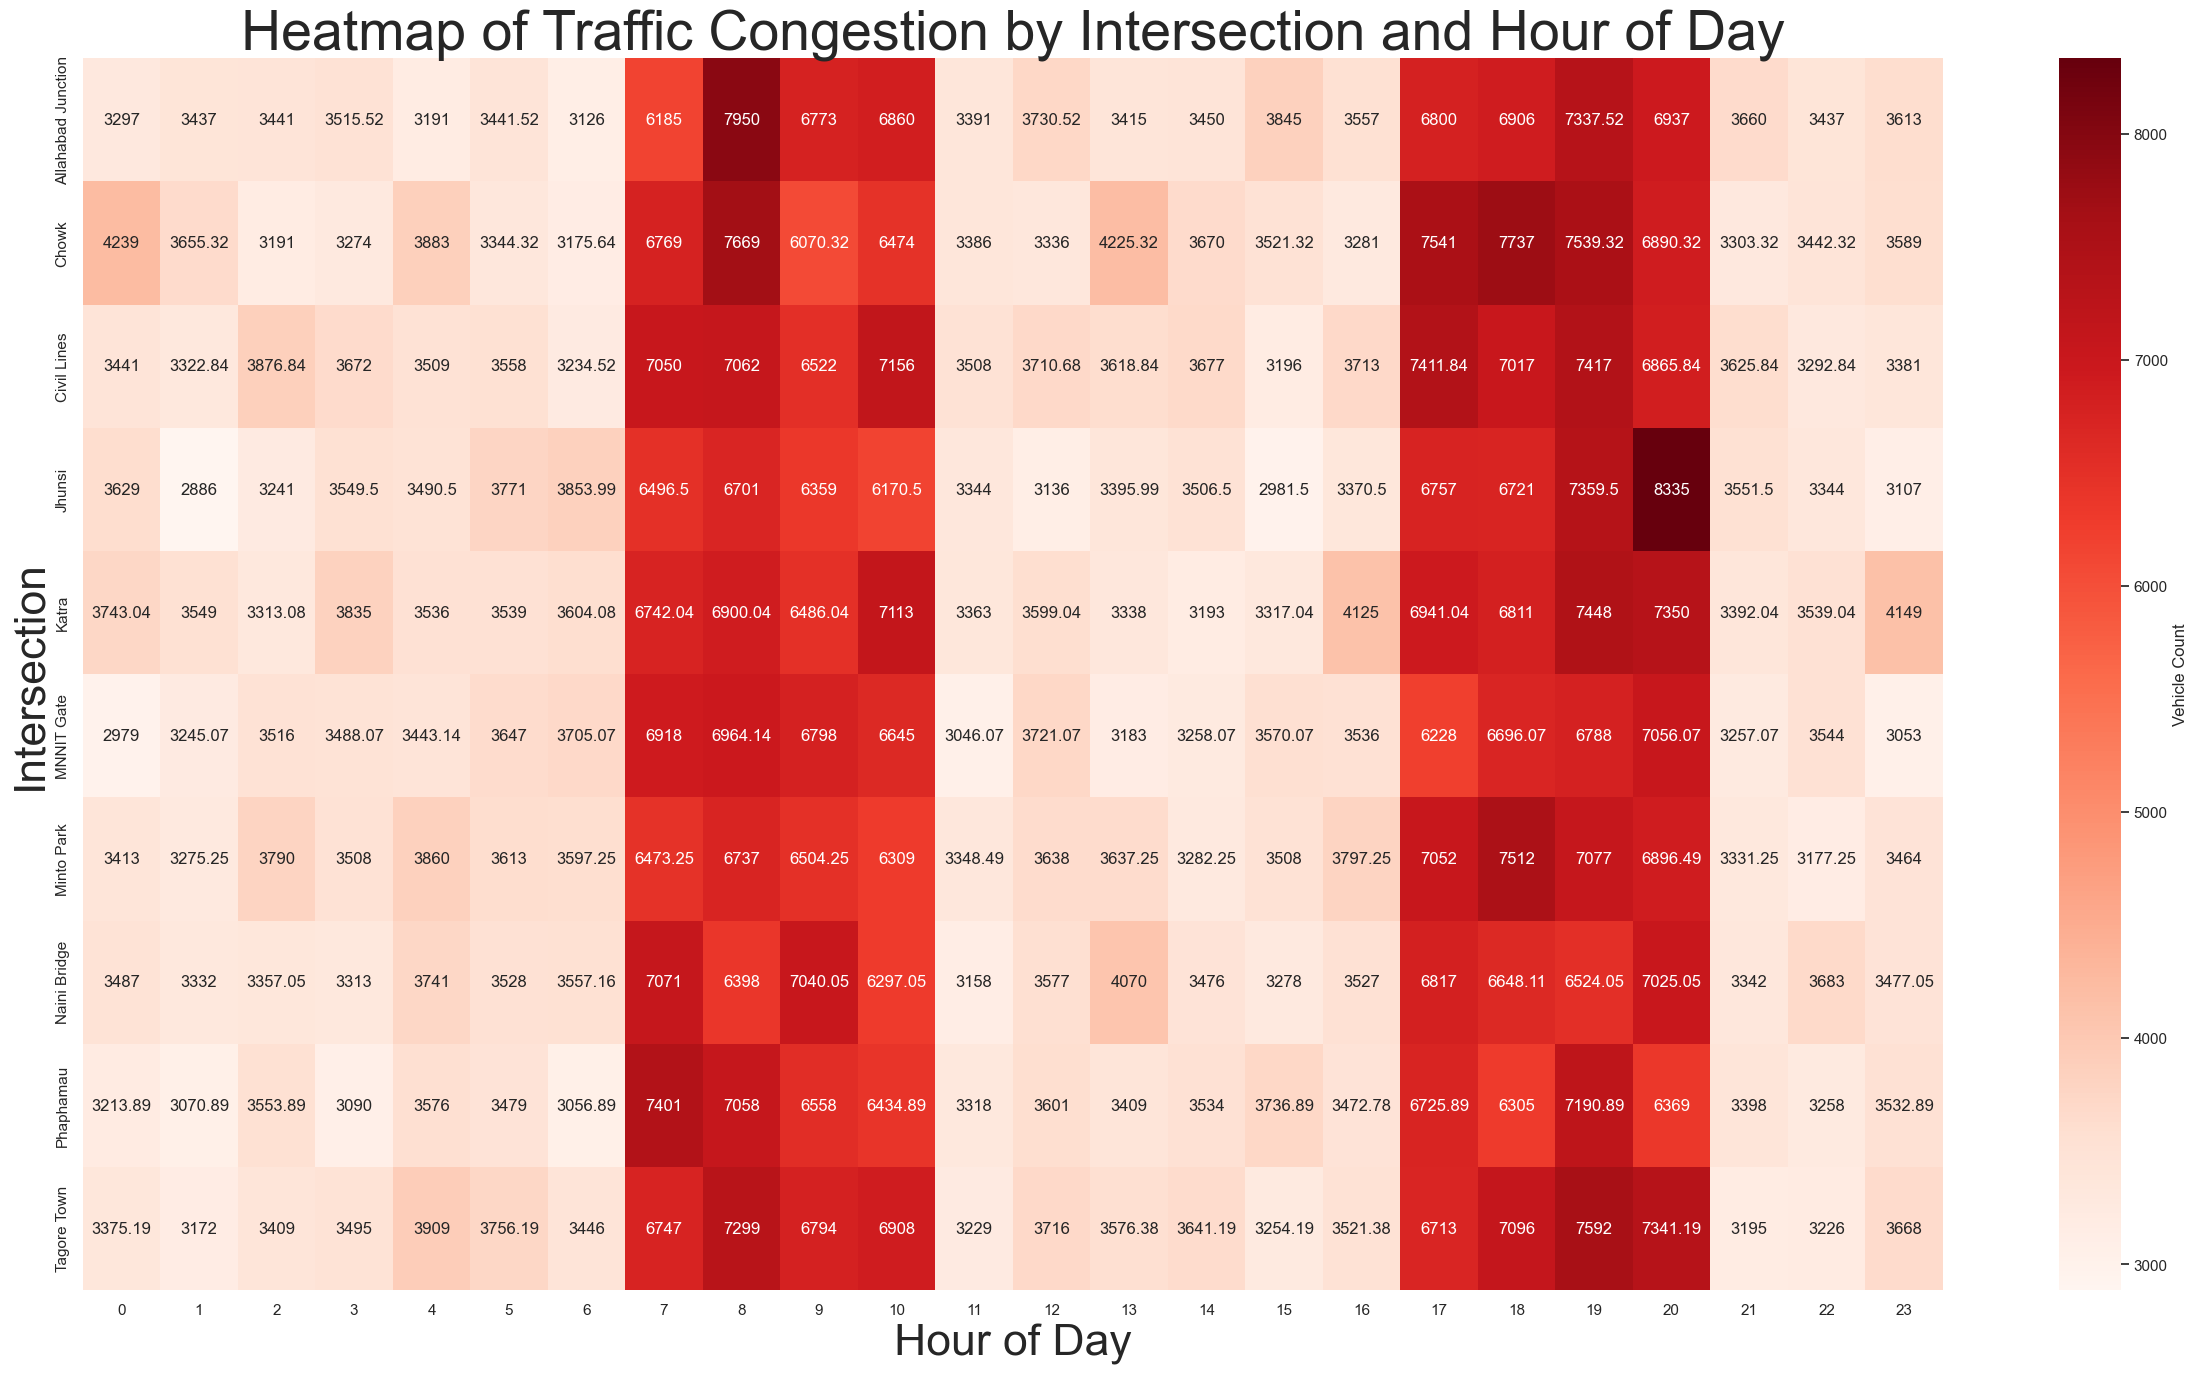

In [53]:
# Step 1: Create a pivot table to summarize data by intersection_name and hour_of_day
heatmap_data = df.pivot_table(index='intersection_name', columns='hour_of_day', values='vehicle_count', aggfunc='sum')

# Step 2: Create the heatmap
plt.figure(figsize=(30, 16))  # Adjust figure size as needed
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt="g", cbar_kws={'label': 'Vehicle Count'})

# Step 3: Set title and labels
plt.title('Heatmap of Traffic Congestion by Intersection and Hour of Day', fontsize=40)
plt.xlabel('Hour of Day', fontsize=32)
plt.ylabel('Intersection', fontsize=32)

Correlation Coefficient between Traffic and Average Speed -0.7751181713227715
Correlation Coefficient between Traffic and Pollution 0.9735617595085584


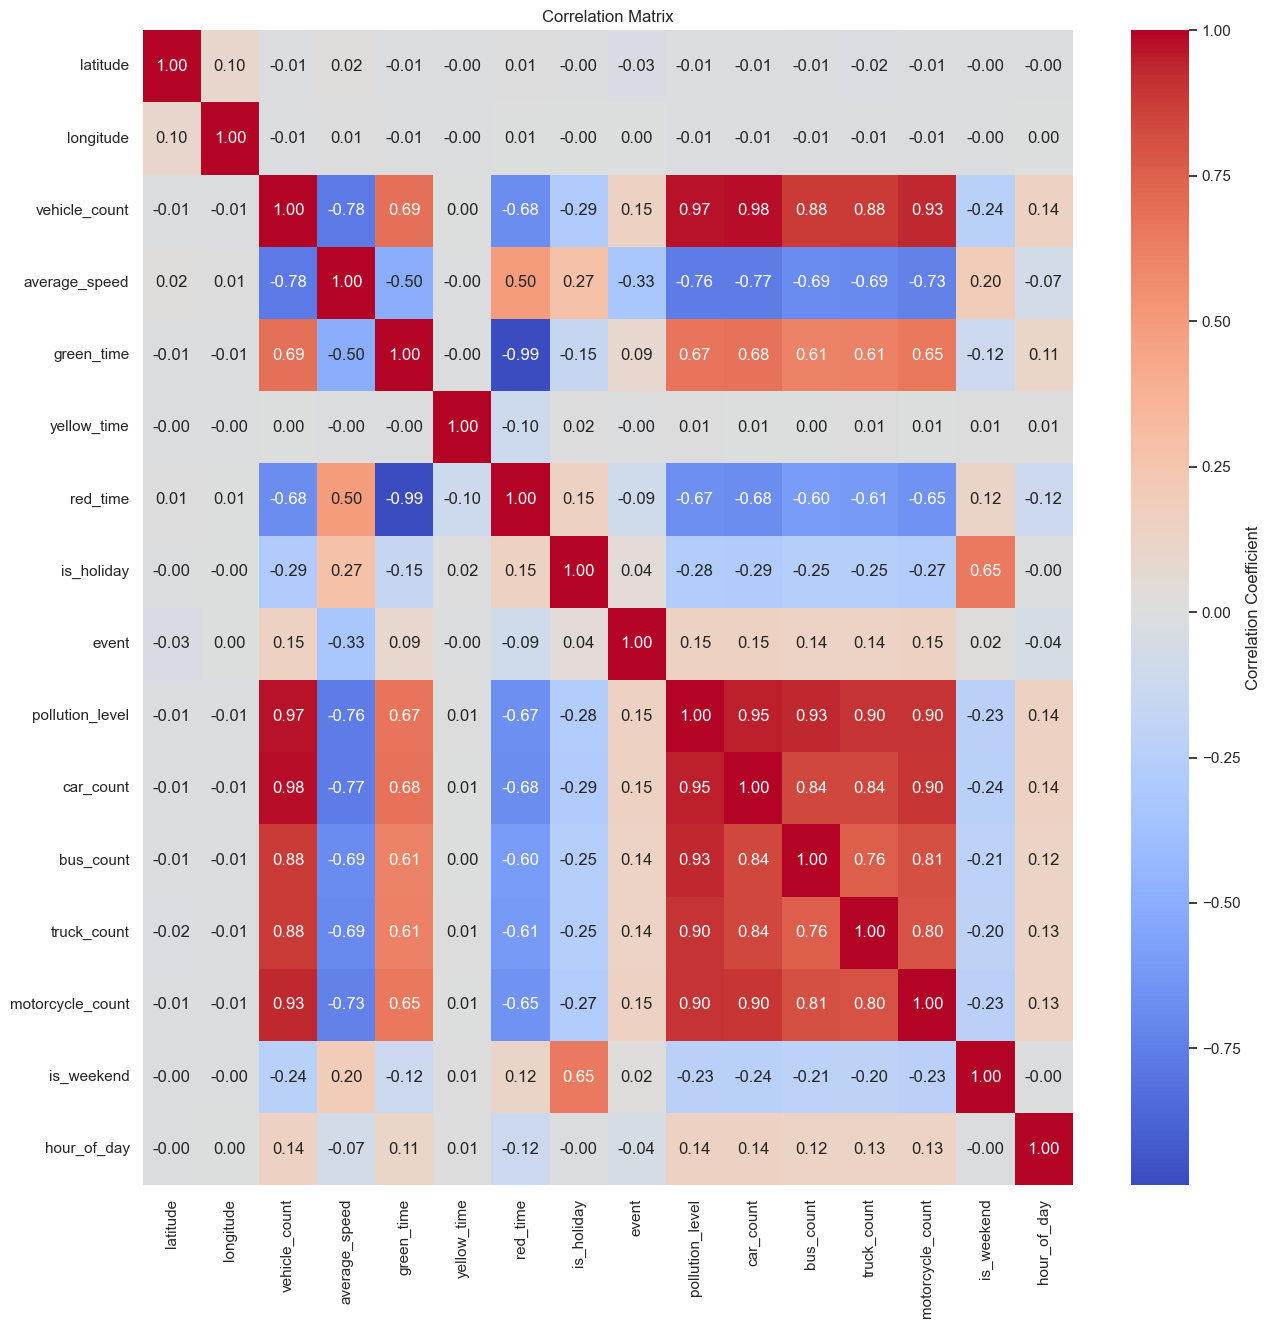

In [54]:
# Step 1: Calculate correlation coefficients
Corr_coef_traffic_VS_avgspeed = df['vehicle_count'].corr(df['average_speed'])
Corr_coef_traffic_VS_pollution = df['vehicle_count'].corr(df['pollution_level'])

print("Correlation Coefficient between Traffic and Average Speed", Corr_coef_traffic_VS_avgspeed)
print("Correlation Coefficient between Traffic and Pollution", Corr_coef_traffic_VS_pollution)

# Step 2: Create a correlation matrix by dropping irrelevant columns
corr_data = df.drop(['signal_cycle_time','record_id','timestamp' ,'intersection_name' , 'intersection_id', 
                       'day_of_week', 'weather_condition'], axis=1)

correlation_matrix = corr_data.corr()

# Step 3: Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

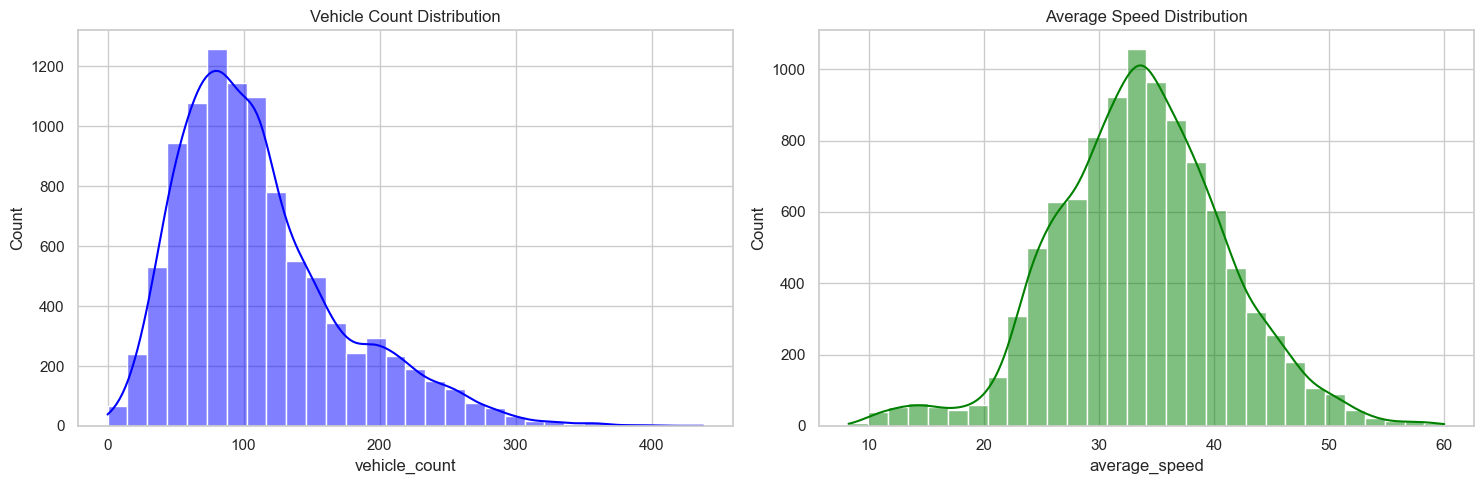

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for distribution curves
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Vehicle Count Distribution
sns.histplot(df['vehicle_count'], bins=30, ax=axs[0], kde=True, color='blue')
axs[0].set_title('Vehicle Count Distribution')

# Average Speed Distribution
sns.histplot(df['average_speed'], bins=30, ax=axs[1], kde=True, color='green')
axs[1].set_title('Average Speed Distribution')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


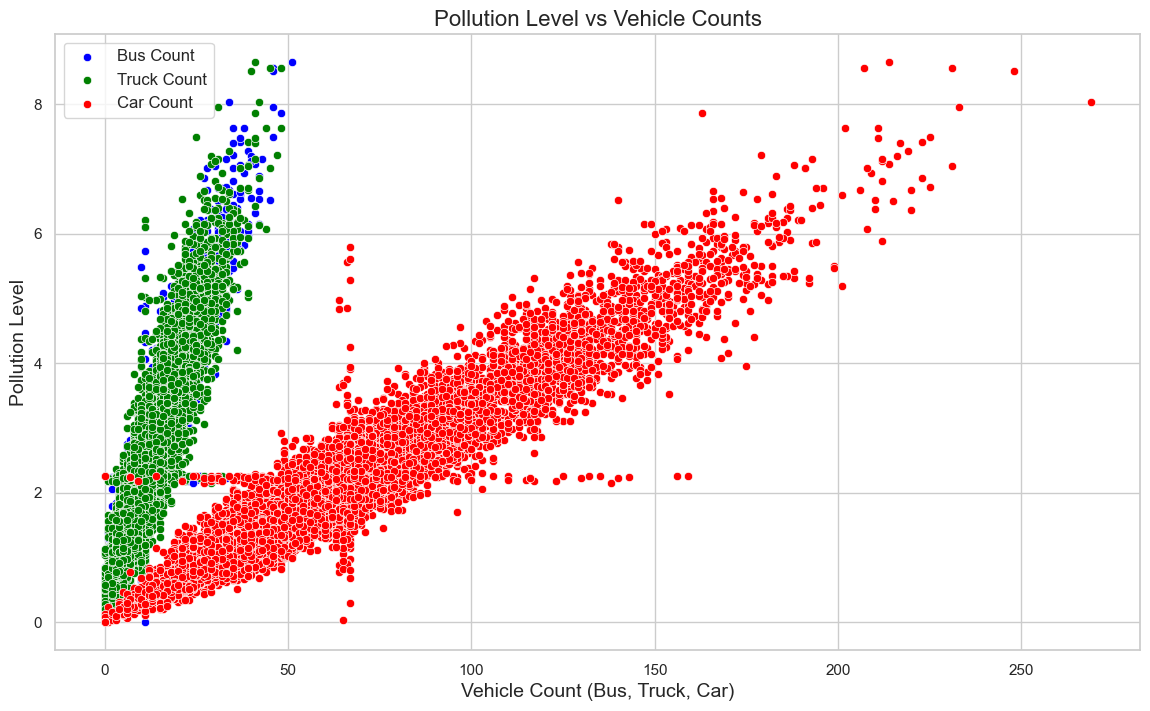

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 8))

# Scatter plot for Bus Count vs Pollution Level
sns.scatterplot(x='bus_count', y='pollution_level', data=df, label='Bus Count', color='blue')

# Scatter plot for Truck Count vs Pollution Level
sns.scatterplot(x='truck_count', y='pollution_level', data=df, label='Truck Count', color='green')

# Scatter plot for Car Count vs Pollution Level
sns.scatterplot(x='car_count', y='pollution_level', data=df, label='Car Count', color='red')

# Set title and labels
plt.title('Pollution Level vs Vehicle Counts', fontsize=16)
plt.xlabel('Vehicle Count (Bus, Truck, Car)', fontsize=14)
plt.ylabel('Pollution Level', fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
